# Importing Libraries and Packages

We will use these packages to help us manipulate the data and visualize the features/labels as well as measure how well our model performed. Numpy and Pandas are helpful for manipulating the dataframe and its columns and cells. We will use matplotlib along with Seaborn to visualize our data.

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

# Loading and Viewing Data Set

With Pandas, we can load both the training and testing set that we wil later use to train and test our model. Before we begin, we should take a look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics. We can also look at its keys and column names.

In [2]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [3]:
training.head() #to see the first 5 data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
training.describe().T #statistical information of the data

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
training.info  # To get an information 

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Dealing with NaN Values (Imputation)

There are NaN values in our data set in the age column. Furthermore, the Cabin column has too many missing values and isn't useful to be used in predicting survival. We can just drop the column as well as the NaN values which will get in the way of training our model. We also need to fill in the NaN values with replacement values in order for the model to have a complete prediction for every row in the data set. This process is known as imputation and we will show how to replace the missing data.

In [9]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


We take a look at the distribution of the Age column to see if it's skewed or symmetrical. This will help us determine what value to replace the NaN values.

<AxesSubplot:xlabel='Age', ylabel='Density'>

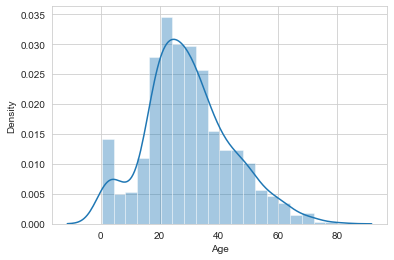

In [11]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

Looks like the distribution of ages is slightly skewed right. Because of this, we can fill in the null values with the median for the most accuracy.

In [12]:
#the median will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


# Plotting and Visualizing Data

It is very important to understand and visualize any data we are going to use in a machine learning model. By visualizing, we can see the trends and general associations of variables like Sex and Age with survival rate. We can make several different graphs for each feature we want to work with to see the entropy and information gain of the feature.

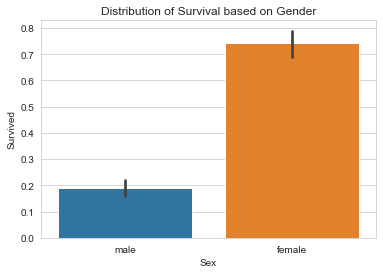

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [13]:
#Gender
#can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))


Note that the numbers printed above are the proportion of male/female survivors of all the surviviors ONLY. The graph shows the propotion of male/females out of ALL the passengers including those that didn't survive.

Gender appears to be a very good feature to use to predict survival, as shown by the large difference in propotion survived. Let's take a look at how class plays a role in survival as well.


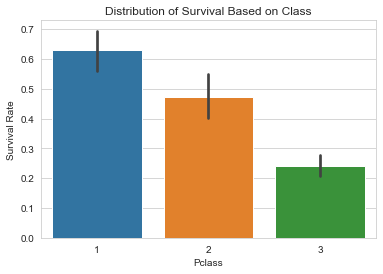

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [14]:
#Class
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)


Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

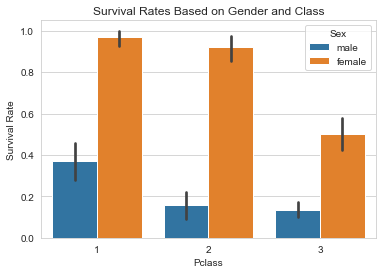

In [15]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
#help(sns.barplot)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

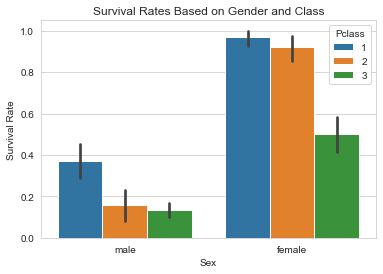

In [16]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

It appears that class also plays a role in survival, as shown by the bar graph. People in Pclass 1 were more likely to survive than people in the other 2 Pclasses.

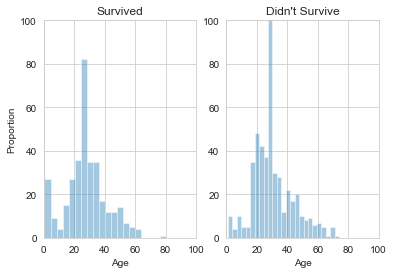

In [17]:
#Age
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

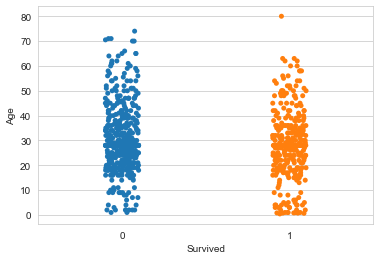

In [18]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

It appears as though passengers in the younger range of ages were more likely to survive than those in the older range of ages, as seen by the clustering in the strip plot, as well as the survival distributions of the histogram.

Here is one final cumulative graph of a pair plot that shows the relations between all of the different features

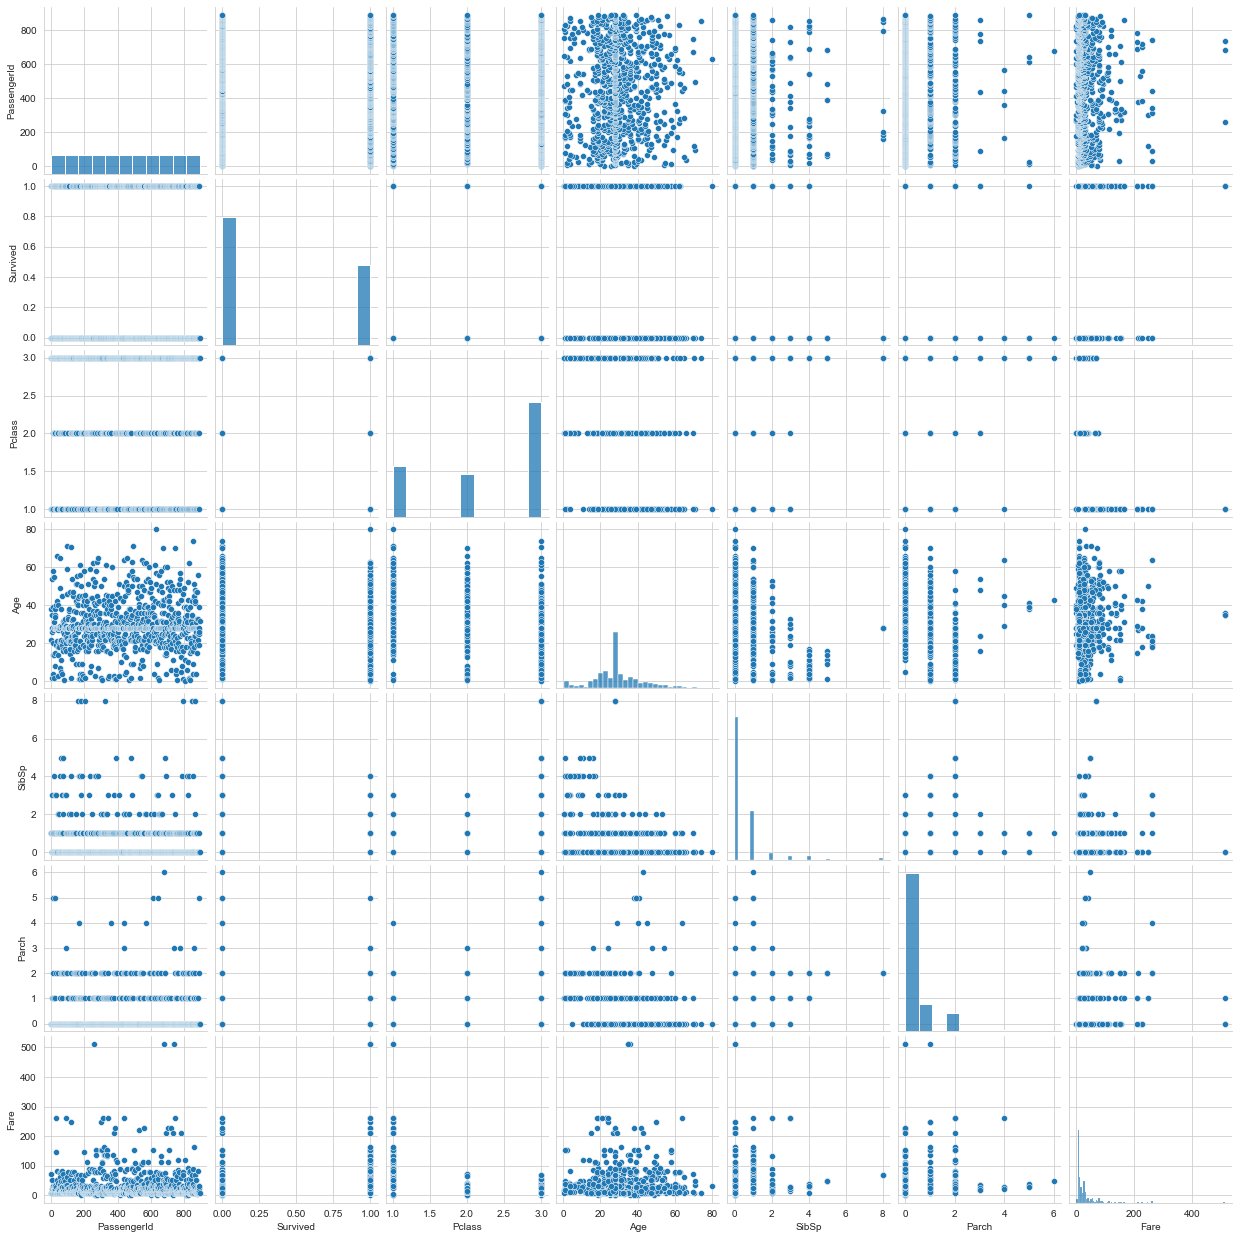

In [19]:
sns.pairplot(training)

# Feature Engineering

Because values in the Sex and Embarked columns are categorical values, we have to represent these strings as numerical values in order to perform our classification with our model. We can also do this process through One-Hot-Encoding.

In [20]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
760,761,0,3,"Garfirth, Mr. John",male,28.0,0,0,14.5000,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,52.5542,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,S
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,83.4750,S
839,840,1,1,"Marechal, Mr. Pierre",male,28.0,0,0,29.7000,C


In [21]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
205,1097,1,"Omont, Mr. Alfred Fernand",male,27.0,0,0,25.7417,C
29,921,3,"Samaan, Mr. Elias",male,27.0,2,0,21.6792,C
122,1014,1,"Schabert, Mrs. Paul (Emma Mock)",female,35.0,1,0,57.7500,C
394,1286,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,22.0250,S
36,928,3,"Roth, Miss. Sarah A",female,27.0,0,0,8.0500,S


We change Sex to binary, as either 1 for female or 0 for male. We do the same for Embarked. We do this same process on both the training and testing set to prepare our data for Machine Learning.

In [22]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

In [23]:
testing.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
410,1302,3,"Naughton, Miss. Hannah",1,27.0,0,0,7.7500,2
117,1009,3,"Sandstrom, Miss. Beatrice Irene",1,1.0,1,1,16.7000,0
18,910,3,"Ilmakangas, Miss. Ida Livija",1,27.0,1,0,7.9250,0
332,1224,3,"Thomas, Mr. Tannous",0,27.0,0,0,7.2250,1
390,1282,1,"Payne, Mr. Vivian Ponsonby",0,23.0,0,0,93.5000,0
132,1024,3,"Lefebre, Mrs. Frank (Frances)",1,27.0,0,4,25.4667,0
149,1041,2,"Lahtinen, Rev. William",0,30.0,1,1,26.0000,0
375,1267,1,"Bowen, Miss. Grace Scott",1,45.0,0,0,262.3750,1
295,1187,3,"Angheloff, Mr. Minko",0,26.0,0,0,7.8958,0
310,1202,3,"Cacic, Mr. Jego Grga",0,18.0,0,0,8.6625,0


We can combine SibSp and Parch into one synthetic feature called family size, which indicates the total number of family members on board for each member.

In [24]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

This IsAlone feature also may work well with the data we're dealing with, telling us whether the passenger was along or not on the ship.

In [25]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

Although it may not seem like it, we can also extract some useful information from the name column. Not the actual names themselves, but the title of their names like Ms. or Mr. This may also provide a hint as to whether the passenger survived or not. Therefore we can extract this title and then encode it like we did for Sex and Embarked.

In [26]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other", "Rev": "Other", "Dr": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Other", "Title"] = 4

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Other", "Title"] = 4

In [27]:
print(set(training["Title"]))

{0, 1, 2, 3, 4}


In [28]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
172,173,1,3,"Johnson, Miss. Eleanor Ileen",1,1.0,1,1,11.1333,0,3,0,0
773,774,0,3,"Elias, Mr. Dibo",0,28.0,0,0,7.2250,1,1,1,1
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",1,28.0,0,1,55.0000,0,2,0,2
449,450,1,1,"Peuchen, Major. Arthur Godfrey",0,52.0,0,0,30.5000,0,1,1,4
482,483,0,3,"Rouse, Mr. Richard Henry",0,50.0,0,0,8.0500,0,1,1,1


# Model Fitting and Predicting¶

Now that our data has been processed and formmated properly, and that we understand the general data we're working with as well as the trends and associations, we can start to build our model. We can import different classifiers from sklearn. We will try different types of models to see which one gives the best accuracy for its predictions.



In [29]:
#sklearn Models to Test
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

To evaluate our model performance, we can use the make_scorere and accuracy_score function from sklearn metrics.

In [30]:
from sklearn.metrics import make_scorer, accuracy_score 

We can also use a GridSearch cross validation to find the optimal parameters for the model we choose to work with and use to predict on our testing set.

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
#Defining Features in Training/Test Set
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
X_train = training[features] #define training features set
y_train = training["Survived"] #define training label set
X_test = testing[features] #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

Although we already have a test set, it is generally easy to overfit the data with these classifiers. It is therefore useful to have a third data set called the validation data set to ensure that our model doesn't overfit with the data. We can make this third data set with sklearn's train_test_split function. We can also use the validation data set to test the general accuracy of our model.

In [33]:
#Validation Data Set
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [34]:
#SVC Model
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.7262569832402235


In [35]:
#LinearSVC Model
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)


0.7374301675977654


In [36]:
#RandomForest Model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8435754189944135


In [37]:
#LogisiticRegression Model
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8100558659217877


In [38]:
#KNeighbors Model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7430167597765364


In [39]:
#GaussianNB Model
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7877094972067039


In [40]:
#DecisionTree Model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.776536312849162


# Evaluating Model Performances

After making so many models and predictions, we should evaluate and see which model performed the best and which model to use on our testing set.



In [41]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.843575
3,Logistic Regression,0.810056
5,Gaussian Naive Bayes,0.787709
6,Decision Tree,0.776536
4,K Nearest Neighbors,0.743017
1,Linear SVC,0.737430
0,SVC,0.726257


It appears that the Random Forest model works the best with our data so we will use it on the test set.

# Tuning Parameters with GridSearchCV

We can improve the accuracy of our model by turning the hyperparameters of our Random Forest model. We will run a GridSearchCV to find the best parameters for the model and use that model to train and test our data.

In [42]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=6)

Great, now that we have the optimal parameters for our Random Forest model, we can build a new model with those parameters to fit and use on the test set.

In [43]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=6)

# Submission

Let's create a dataframe to submit to the competition with our predictions of our model.

In [44]:
submission_predictions =rf_clf.predict(X_test)

In [45]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)
